<a href="https://www.kaggle.com/code/klyushnik/multi-normal?scriptVersionId=168374634" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline
'''
!pip install AutoViz
!pip install xlrd
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv
/kaggle/input/ec-mixed-class/mixed_fcfp.csv
/kaggle/input/ec-mixed-class/mixed_desc.csv
/kaggle/input/ec-mixed-class/mixed_ecfp.csv


'\n!pip install AutoViz\n!pip install xlrd\n'

# # Auto EDA

In [2]:
'''from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()'''

'from autoviz.AutoViz_Class import AutoViz_Class\n\nAV = AutoViz_Class()'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

#dftc = AV.AutoViz('/kaggle/input/playground-series-s3e18/train.csv')

# # Load data

In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv')

In [5]:
train = train.drop(columns=["id"])
test = test.drop(columns=["id"])

print('Shape train =', train.shape)
print('Shape test =', test.shape)

Shape train = (14838, 37)
Shape test = (9893, 31)


# # Aggregate Featrues

In [6]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [7]:
numerical_data = ['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n',
                 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
                 'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
                 'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
                 'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
                 'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
                 'fr_COO', 'fr_COO2']
for i in numerical_data:
    train[i+' +log'] = (train[i]+1).transform(np.log)
    test[i+' +log'] =(test[i]+1).transform(np.log)
######################################################
for i in numerical_data:
    train[i+'+log1'] = (train[i]+1).transform(np.log1p)
    test[i+'+log1'] =(test[i]+1).transform(np.log1p)
######################################################
transform = PowerTransformer(method='yeo-johnson')
for i in numerical_data:
    train[i+'+y_j'] = transform.fit_transform(train[[i]])
    test[i+'+y_j'] = transform.fit_transform(test[[i]])
######################################################
transform = QuantileTransformer(n_quantiles=10, random_state=0)
for i in numerical_data:
    train[i+'+q_t'] = transform.fit_transform(train[[i]])
    test[i+'+q_t'] = transform.fit_transform(test[[i]])
######################################################
for i in numerical_data:
    train[i+'+sqrt'] = (train[i]+1).transform(np.sqrt)
    test[i+'+sqrt'] =(test[i]+1).transform(np.sqrt)
######################################################
maxabs = MaxAbsScaler()
for i in numerical_data:
    train[i+'+abs'] = maxabs.fit_transform(train[[i]])
    test[i+'+abs'] =maxabs.fit_transform(test[[i]])
######################################################
minmax = MinMaxScaler()
for i in numerical_data:
    train[i+'+minmax'] = minmax.fit_transform(train[[i]])
    test[i+'+minmax'] = minmax.fit_transform(test[[i]])
######################################################
rob = RobustScaler()
for i in numerical_data:
    train[i+'+rob'] = rob.fit_transform(train[[i]])
    test[i+'+rob'] = rob.fit_transform(test[[i]])
######################################################
norm = preprocessing.Normalizer()
for i in numerical_data:
    train[i+'+norm'] = norm.fit_transform(train[[i]])
    test[i+'+norm'] = norm.fit_transform(test[[i]])
######################################################

print('Shape train =', train.shape)
print("Shape test =", test.shape)

Shape train = (14838, 316)
Shape test = (9893, 310)


# # Polynomial Features labeled

In [8]:
def PolynomialFeatures_labeled(input_df,power):
   
    poly = preprocessing.PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s+%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + "x" + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

output_df = PolynomialFeatures_labeled(train.iloc[:,:15],2)
output_df_t = PolynomialFeatures_labeled(test.iloc[:,:15],2)

In [9]:
train =  pd.concat([train.reset_index(drop=True), output_df], axis = 1)
test = pd.concat([test.reset_index(drop=True), output_df_t], axis = 1)

print('Shape train =', train.shape)
print('Shape test =', test.shape)

Shape train = (14838, 452)
Shape test = (9893, 446)


# # Mini problems

In [10]:
train = train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
test = test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

#train = train.fillna(0)
#test = test.fillna(0)

print('Shape train =', train.shape)
print('Shape test =', test.shape)

Shape train = (14838, 452)
Shape test = (9893, 446)


# # StandardScaler and feature_selection


In [11]:
X = train.drop(['EC1','EC2','EC3','EC4','EC5','EC6'],axis=1)
y = train['EC1']
y1 = train['EC2']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [13]:
from sklearn.feature_selection import RFECV
from catboost import CatBoostClassifier

In [14]:
clf = CatBoostClassifier(iterations = 600, verbose = 0)
selector = RFECV(estimator = clf, cv = 3, min_features_to_select=30, step=1, scoring = 'roc_auc')
selector.fit(X_train, y_train)

RFECV(cv=3,
      estimator=<catboost.core.CatBoostClassifier object at 0x7d972f885360>,
      min_features_to_select=30, scoring='roc_auc')

In [15]:
list_name = X_train.columns[selector.support_]
print('Best features :', X_train.columns[selector.support_])

Best features : Index(['BertzCT', 'Chi1v', 'Chi3v', 'Chi4n', 'EState_VSA1', 'EState_VSA2',
       'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2',
       'FpDensityMorgan3',
       ...
       'FpDensityMorgan1+2', 'FpDensityMorgan1+1xFpDensityMorgan2+1',
       'FpDensityMorgan1+1xFpDensityMorgan3+1',
       'FpDensityMorgan1+1xHallKierAlpha+1', 'FpDensityMorgan2+2',
       'FpDensityMorgan2+1xFpDensityMorgan3+1',
       'FpDensityMorgan2+1xHallKierAlpha+1', 'FpDensityMorgan3+2',
       'FpDensityMorgan3+1xHallKierAlpha+1', 'HallKierAlpha+2'],
      dtype='object', length=355)


In [16]:
X = train[list_name]
y = train['EC1']
y1 = train['EC2']

test = test[list_name]

print('Shape train =', X.shape)
print('Shape test =', test.shape)

Shape train = (14838, 355)
Shape test = (9893, 355)


In [17]:
import optuna
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import catboost
from catboost import *
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier

# # Parametrs

In [18]:
early_stopping_rounds = 50
n_splits=5
shuffle=True
random_state = 2023

cat_EC1 = { 'iterations': 880,
           'learning_rate': 0.00700875930530933,
           'depth': 5,
           'l2_leaf_reg': 0.06386326430523195,
           'bootstrap_type': 'Bayesian',
           'random_strength': 0.006761179297312255,
           'bagging_temperature': 1.7090795531892353,
           'od_type': 'Iter'}

cat_EC2 = {'iterations': 713,
           'learning_rate': 0.02405012199589256,
           'depth': 4,
           'l2_leaf_reg': 32.75731485128269,
           'bootstrap_type': 'Bayesian',
           'random_strength': 0.055728302689765974,
           'bagging_temperature': 0.5525230387712001,
           'od_type': 'Iter'}

lgb_EC1 = {'n_estimators': 550,
           'lambda_l1': 6.033092580323567e-08,
           'lambda_l2': 1.4139997941616426e-05,
           'num_leaves': 39,
           'feature_fraction': 0.9993669918518181,
           'bagging_fraction': 0.43042054914772554,
           'bagging_freq': 1,
           'min_child_samples': 29}

lgb_EC2 = {'n_estimators': 550,
           'lambda_l1': 6.809293511103775e-05,
           'lambda_l2': 1.7494475147428669e-06,
           'num_leaves': 9,
           'feature_fraction': 0.671850964104425,
           'bagging_fraction': 0.4953567504965811,
           'bagging_freq': 1,
           'min_child_samples': 20}

xgb_EC1 = {'n_estimators': 550,
           'booster': 'gbtree',
           'lambda': 1.0828361526254198e-07,
           'alpha': 0.005800664989416687,
           'subsample': 0.4531036360822481,
           'colsample_bytree': 0.36381530598713063,
           'max_depth': 5,
           'min_child_weight': 5,
           'eta': 5.747872086407015e-05,
           'gamma': 0.7309967543006256,
           'grow_policy': 'lossguide',
           'sample_type': 'weighted',
           'normalize_type': 'forest'}

xgb_EC2 = {'n_estimators':550,
           'booster': 'gbtree',
           'lambda': 0.00013793359449902861,
           'alpha': 7.175362114860653e-08,
           'subsample': 0.6693268805715942,
           'colsample_bytree': 0.7961315660200081,
           'max_depth': 7,
           'min_child_weight': 2,
           'eta': 8.08781314915615e-05,
           'gamma': 0.0006793734330704181,
           'grow_policy': 'lossguide',
           'sample_type': 'weighted',
           'normalize_type': 'forest',
           'rate_drop': 6.66308914539398e-05,
           'skip_drop': 0.0003917501103957761}


In [19]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# # Compare for EC1

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [21]:
clf1 = Pipeline([('scale',StandardScaler()),
                 ('clf1',CatBoostClassifier(**cat_EC1,
                                            early_stopping_rounds=early_stopping_rounds,
                                            verbose = 0))])

clf2 = Pipeline([('scale',StandardScaler()),
                 ('cslf3',lgb.LGBMClassifier(**lgb_EC1))])

clf3 = Pipeline([('scale',StandardScaler()),
                 ('clf4',xgb.XGBClassifier(**xgb_EC1))])

clf4 = Pipeline([('scale',StandardScaler()),
                 ('clf4',CalibratedClassifierCV(CatBoostClassifier(**cat_EC1,
                                                                   early_stopping_rounds=early_stopping_rounds,
                                                                   verbose = 0),
                                                cv=StratifiedKFold(n_splits=n_splits,
                                                                   shuffle=shuffle, 
                                                                   random_state=random_state)))])

clf5 = Pipeline([('scale',StandardScaler()),
                 ('clf5',CalibratedClassifierCV(xgb.XGBClassifier(**xgb_EC1),
                                                cv=StratifiedKFold(n_splits=n_splits,shuffle=shuffle,
                                                                   random_state=random_state)))])



sclf = Pipeline([('scale',StandardScaler()),
                 ('stak',StackingCVClassifier(classifiers = [clf1,
                                                             clf2,
                                                             clf3,
                                                             clf4,
                                                             clf5],                                                            
                                              shuffle = False,
                                              use_probas = True,
                                              cv = StratifiedKFold(n_splits=n_splits,
                                                                   shuffle=shuffle ,
                                                                   random_state=random_state),
                                              meta_classifier = CatBoostClassifier(**cat_EC1,
                                                                                   early_stopping_rounds=early_stopping_rounds,
                                                                                   verbose = 0)))])
##############################################################################################################
classifiers = {"cat": clf1,
               "lgb": clf2,
               "xgb": clf3,
               'calib1' : clf4,
               'calib2':clf5,
               "Stack": sclf}
##############################################################################################################
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier


[LightGBM] [Warning] lambda_l1 is set=6.033092580323567e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.033092580323567e-08
[LightGBM] [Warning] feature_fraction is set=0.9993669918518181, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9993669918518181
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.4139997941616426e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4139997941616426e-05
[LightGBM] [Warning] bagging_fraction is set=0.43042054914772554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43042054914772554
[12:43:52] WARNING: ../src/learner.cc:767: 
Parameters: { "normalize_type", "sample_type" } are not used.

[12:47:21] WARNING: ../src/learner.cc:767: 
Parameters: { "normalize_type", "sample_type" } are not used.

[12:48:12] WARNING: ../src/learner.cc:767: 
Parameters: { "normalize_type", "sample_type" } ar

In [22]:
results_EC1 = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results_EC1[f"{key}"] = y_pred

# Add the test set to the results object
results_EC1['Target'] = y_test.index.duplicated()
results_EC1.head()

,cat,lgb,xgb,calib1,calib2,Stack,Target
0,0.756202,0.993263,0.508154,0.773080,0.773107,0.767323,False
1,0.439743,0.564063,0.498291,0.408747,0.446638,0.442739,False
2,0.723945,0.941388,0.506431,0.726006,0.715804,0.747692,False
3,0.461765,0.121887,0.499421,0.449876,0.468583,0.466858,False
4,0.848466,0.924838,0.510873,0.833244,0.837324,0.850977,False


# # Visualizing Results EC1

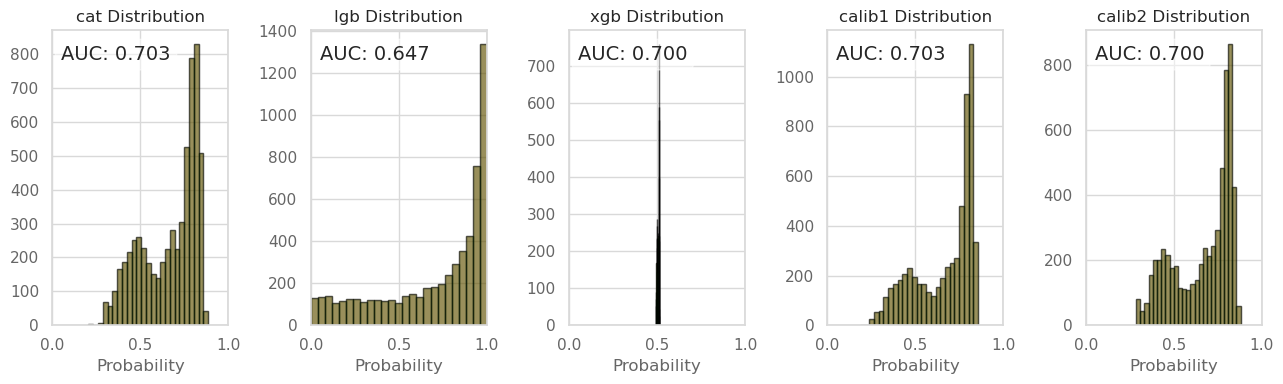

In [23]:
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = results_EC1[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results_EC1[results_EC1["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results_EC1[results_EC1["Target"] == 1]
    sns.distplot(results_EC1[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

# # Make predict EC1

In [24]:
for key in classifiers:
    # Make prediction on test set
    y_pred_EC1 = classifiers[key].predict_proba(test)[:,1]

# # Compare for EC2

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.40, random_state=42)

In [26]:
clf1 = Pipeline([('scale',StandardScaler()),
                 ('clf1',CatBoostClassifier(**cat_EC2,
                                            early_stopping_rounds=early_stopping_rounds,
                                            verbose = 0))])

clf2 = Pipeline([('scale',StandardScaler()),
                 ('clf2',lgb.LGBMClassifier(**lgb_EC2))])

clf3 = Pipeline([('scale',StandardScaler()),
                 ('clf3',xgb.XGBClassifier(**xgb_EC2))])

clf4 = Pipeline([('scale',StandardScaler()),
                 ('clf4',CalibratedClassifierCV(CatBoostClassifier(**cat_EC2,
                                                                   early_stopping_rounds=early_stopping_rounds,
                                                                   verbose = 0),
                                                cv=StratifiedKFold(n_splits=n_splits,
                                                                   shuffle=shuffle, 
                                                                   random_state=random_state)))])

clf5 = Pipeline([('scale',StandardScaler()),
                 ('clf5',CalibratedClassifierCV(xgb.XGBClassifier(**xgb_EC2),
                                                cv=StratifiedKFold(n_splits=n_splits,shuffle=shuffle,
                                                                   random_state=random_state)))])


sclf = Pipeline([('scale',StandardScaler()),
                 ('stak',StackingCVClassifier(classifiers = [clf1,
                                                             clf2,
                                                             clf3,
                                                             clf4,
                                                             clf5],                                                            
                                              shuffle = False,
                                              use_probas = True,
                                              cv = StratifiedKFold(n_splits=n_splits,
                                                                   shuffle=shuffle ,
                                                                   random_state=random_state),
                                              meta_classifier = CatBoostClassifier(**cat_EC2,
                                                                                   early_stopping_rounds=early_stopping_rounds,
                                                                                   verbose = 0)))])
##############################################################################################################
classifiers = {"cat": clf1,
               "lgb": clf2,
               "xgb": clf3,
               'calib1' : clf4,
               'calib2':clf5,
               "Stack": sclf}
##############################################################################################################
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

[LightGBM] [Warning] lambda_l1 is set=6.809293511103775e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.809293511103775e-05
[LightGBM] [Warning] feature_fraction is set=0.671850964104425, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.671850964104425
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.7494475147428669e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7494475147428669e-06
[LightGBM] [Warning] bagging_fraction is set=0.4953567504965811, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4953567504965811
[13:38:14] WARNING: ../src/learner.cc:767: 
Parameters: { "normalize_type", "rate_drop", "sample_type", "skip_drop" } are not used.

[13:42:37] WARNING: ../src/learner.cc:767: 
Parameters: { "normalize_type", "rate_drop", "sample_type", "skip_drop" } are not used.

[13:45:04] WARNING: ../src/learner.cc:767: 
Pa

In [27]:
results_EC2 = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results_EC2[f"{key}"] = y_pred

# Add the test set to the results object
results_EC2['Target'] = y_test.index.duplicated()
results_EC2.head()

,cat,lgb,xgb,calib1,calib2,Stack,Target
0,0.726964,0.813875,0.511674,0.736003,0.777658,0.774355,False
1,0.865234,0.865674,0.515972,0.836331,0.836312,0.859892,False
2,0.814037,0.991826,0.510908,0.806581,0.740445,0.824247,False
3,0.867812,0.889176,0.515840,0.840101,0.839753,0.850701,False
4,0.834595,0.860570,0.514086,0.809303,0.812729,0.799913,False


# # Visualizing Results EC2

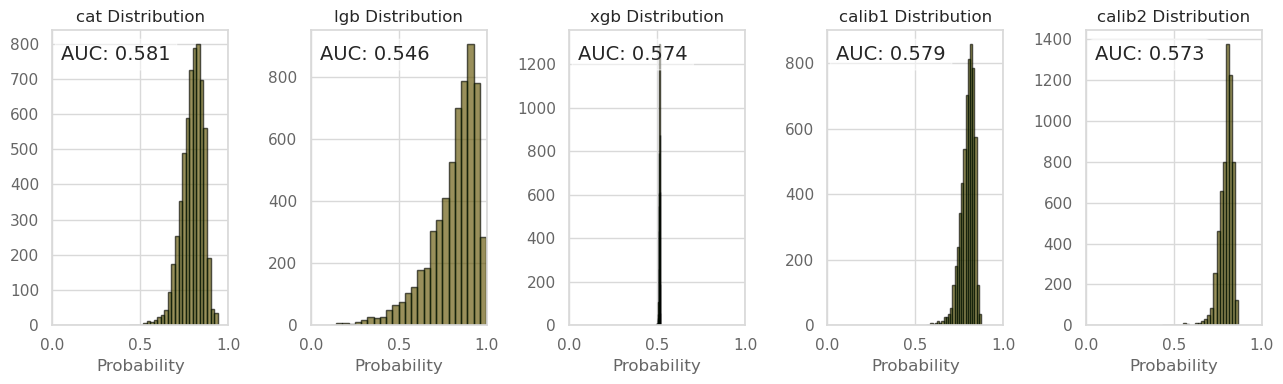

In [28]:
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = results_EC2[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results_EC2[results_EC2["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results_EC2[results_EC2["Target"] == 1]
    sns.distplot(results_EC2[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

# # Make predict EC2

In [29]:
for key in classifiers:
    # Make prediction on test set
    y_pred_EC2 = classifiers[key].predict_proba(test)[:,1]

# # Submit

In [30]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e18/sample_submission.csv')
sub['EC1'] = y_pred_EC1
sub['EC2'] = y_pred_EC2
sub

,id,EC1,EC2
0,14838,0.387320,0.789903
1,14839,0.850283,0.726569
2,14840,0.811837,0.793491
3,14841,0.660192,0.836665
4,14842,0.826722,0.766406
...,...,...,...
9888,24726,0.669302,0.766053
9889,24727,0.791072,0.862552
9890,24728,0.443424,0.839910
9891,24729,0.373816,0.885758


In [31]:
sub.to_csv('submission.csv', index=False)